# Simple Linear regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#To load Dataset advertising.csv
df=pd.read_csv("advertising.csv")  #df user defined dataset , which hold data's of advertising.csv file

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
#First removed Unwanted column Unnamed : 0
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
#To check null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
#To check linear relationship between TV with sales 
#here Independent variable TV means X and dependent variable ->sales means Y
#plot scatter between independent variable and dependent variable

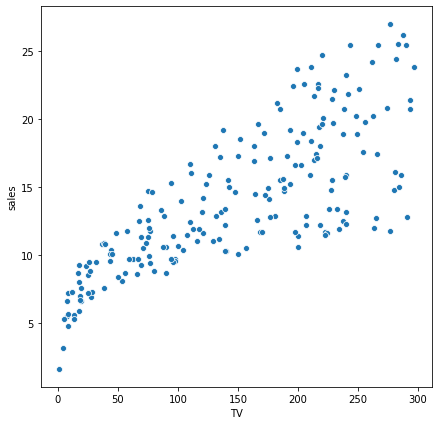

In [9]:
plt.figure(figsize=(7,7))
X=df["TV"]  #independent variable 
Y=df["sales"] #dependent variable 
sns.scatterplot(X,Y)
plt.show()

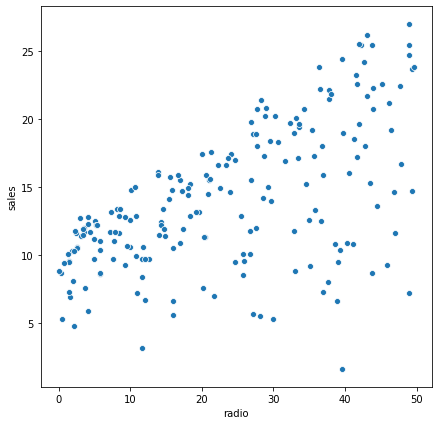

In [10]:
##To check linear relationship between independent variable radio  with dependent variable sales 
plt.figure(figsize=(7,7))
X=df["radio"]  #independent variable 
Y=df["sales"] #dependent variable 
sns.scatterplot(X,Y)
plt.show()

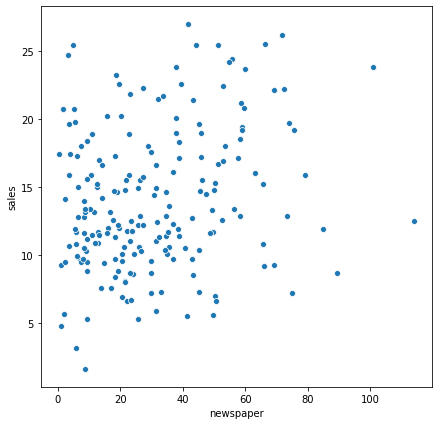

In [11]:
##To check linear relationship between independent variable newspaper  with dependent variable sales 
plt.figure(figsize=(7,7))
X=df["newspaper"]  #independent variable 
Y=df["sales"] #dependent variable 
sns.scatterplot(X,Y)
plt.show()

In [12]:
#Find out correlation value means how much correlation values between independent variables with
#(TV,radio and newspaper)dependend variable
#r means correlation coefficient :  -1 to +1

In [13]:
cor=df.corr()  #corr() inbuilt function

In [14]:
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


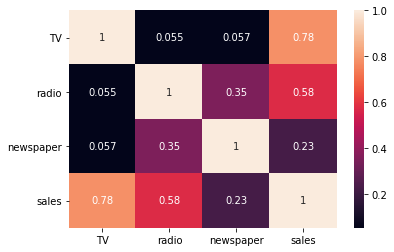

In [15]:
sns.heatmap(cor,annot=True)
plt.show()

In [16]:
#My observation Good correlation with TV and slightly radio

# Performing the modeling 

In [17]:
#create model with TV 
#First select Input variable X and output means target variable Y
X=df[["TV"]] #always input variables should be 2D array means [[]] because expect 2D array
Y=df["sales"]  #output means target variables should be 1D means []

In [18]:
#split these dataset into train and test then call train_test_split() inbuilt function
#there are passing input parameter in train_test_split() and there returns 4 output
#passing input in these function : 
#  X , Y ,test_size=0.3,random_state=1  : input parameter
#return output : x_train,x_test,y_train,y_test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [21]:
df.shape

(200, 4)

In [22]:
X_train.shape

(140, 1)

In [23]:
Y_train.shape

(140,)

In [24]:
X_test.shape

(60, 1)

In [25]:
Y_test.shape

(60,)

In [26]:
#Perform the Linear Regression model

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
#create object of LinearRegression class
lr=LinearRegression() #lr user defined object of LinearRegression class

In [29]:
lr.fit(X_train,Y_train)

LinearRegression()

In [30]:
#show slope means coefficient means m
lr.coef_

array([0.04812204])

In [31]:
#To show intercept    y=mx+b here m-slope and b intercept 
lr.intercept_

6.923519536059553

In [32]:
#Testing means perform the testing 

In [33]:
#predict() inbuilt method of Linear regression class for use testing
y_pred=lr.predict(X_test)   #y=mx+b

# Evaluation method 
#Mean Squared Error MSE [sum of(original sales-predicted sales)^2]/no. of data points
#mean_squared_error() inbuilt function which defined inbuilt class mean_squared_error
from sklearn.metrics import mean_squared_error

In [34]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,y_pred)

In [35]:
rmse=np.sqrt(mse)  #root mean squared error

In [36]:
print("Mean Squared Error : ",mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error :  10.571057434656955
Root Mean Squared Error : 3.251316261863333


In [37]:
#check model is good or not so use main Evalution method r2-score : 
#if r2-score's values close to 1 then model is good otherwise bed
#r2_score() inbuilt function which define inbuilt class r2_score 

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(Y_test,y_pred)  #It is good not bad

0.575061860494331

# next step with independent variable radio
#perform modeling with radio and sales


In [40]:
#select X and Y 
X=df[["radio"]] 
Y=df["sales"]

In [41]:
#train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [42]:
#create object of LinearRegression class
lr=LinearRegression()

In [43]:
#Train the model
lr.fit(X_train,Y_train)

LinearRegression()

In [44]:
#show slope means coefficient means m
lr.coef_

array([0.1874808])

In [45]:
#To show intercept    y=mx+b here m-slope and b intercept 
lr.intercept_

9.440936561425884

In [46]:
#Testing means perform the testing 

In [47]:
y_pred=lr.predict(X_test) #y=mx+b

In [48]:
mse=mean_squared_error(Y_test,y_pred)

In [49]:
rmse=np.sqrt(mse)  #root mean squared error
print("Mean Squared Error : ",mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error :  14.604130559272193
Root Mean Squared Error : 3.8215351050686674


In [50]:
r2_score(Y_test,y_pred)

0.41293932917162335

In [51]:
# next step with independent variable newspaper
#perform modeling with newspaper and sales

In [52]:
#select X and Y 
X=df[["newspaper"]] 
Y=df["sales"]

In [53]:
#train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [54]:
lr=LinearRegression()

In [55]:
#Train the model
lr.fit(X_train,Y_train)

LinearRegression()

In [56]:
lr.coef_

array([0.06532045])

In [57]:
lr.intercept_

11.82966888487788

In [58]:
#testing
y_pred=lr.predict(X_test) #y=mx+b

In [59]:
mse=mean_squared_error(Y_test,y_pred)

In [60]:
rmse=np.sqrt(mse)  #root mean squared error
print("Mean Squared Error : ",mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error :  25.49745237441493
Root Mean Squared Error : 5.049500210358935


In [61]:
r2_score(Y_test,y_pred) #vert less r2-score means it is very bad

-0.024953278429509007

In [62]:
#Multiple Linear Regression 

In [63]:
X=df[["TV","radio","newspaper"]]
Y=df["sales"]

In [64]:
#equation of line :MLR
#  y=m1X1+m2X2+m3X3+b
#here sales=m1*TV+m2*radio+m3*newspaper+b

In [65]:
#train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [66]:
#Create object of LinearRegression
lr=LinearRegression()

In [67]:
#train the model
lr.fit(X_train,Y_train)

LinearRegression()

In [68]:
#show slope means coefficient of TV,radio,newspaper
lr.coef_

array([0.04695205, 0.17658644, 0.00185115])

In [69]:
#when we took only TV (independent variable) then slope(coef) of TV=0.04812204
#BUT when we took TV,radio and newspaper then slope of TV =0.04695205

#similar when we took only radio (independent variable) then slope(coef)
#of radio =0.1874808
##BUT when we took TV,radio and newspaper then slope of radio=0.17658644

#similar when we took only newspaper (independent variable) then slope(coef)
#of newspaper=0.06532045
#BUT when we took TV,radio and newspaper then slope of newspaper =0.00185115

In [70]:
#testing
y_pred=lr.predict(X_test)

In [71]:
mean_squared_error(Y_test,y_pred)

1.9289249074665737

In [72]:
r2_score(Y_test,y_pred)

0.9224605706201434

In [73]:
#MLR
X=df[["TV","radio"]]
Y=df["sales"]

In [74]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
#Lecture : 30-Aug-2020 

In [ ]:
#Model create with two independent variable TV and radio 
#and target means dependent variale sales
#here to remove multicolinearity assumption (to remove newspaper)

In [75]:
# select Independent variable X and dependent variable Y
X=df[["TV","radio"]] #2D array  means Multiple Linear regression
Y=df["sales"] #1D array

In [ ]:
#In MLR : equation : Y=m1X1+m2X2+b
#here sales=m1*TV+m2*radio+b

In [76]:
#train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [77]:
#Create object of LinearRegression class
lr=LinearRegression()

In [78]:
# train the model
lr.fit(X_train,Y_train)

LinearRegression()

In [79]:
#testing error 
y_pred=lr.predict(X_test)

In [80]:
#find mean squared error
mean_squared_error(Y_test,y_pred)


1.9147050289721803

In [81]:
#find r2-score
r2_score(Y_test,y_pred)

0.92303218502568

In [ ]:
#r2-score is best 

In [ ]:
#check first assumption : there shoule be linear relationship between 
#independent variable(TV,radio) with dependent variable sales

In [ ]:
#calculate the residual

In [82]:
residuals=Y_test-y_pred

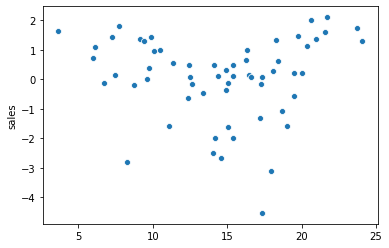

In [84]:
#scatter plot
plt.figure()
sns.scatterplot(y_pred,residuals)
plt.show()

In [ ]:
#This is not a linear relation means not fullfill first assumption of
#linear regression
#here see curve in this plot means this is polynomials relationship

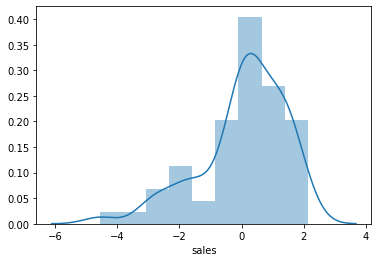

In [85]:
#4. Assumption of Linear Regression : data should be equally distributed
#means Normal distributed curve obtained
#we draw residual against frequency: distplot
plt.figure()
sns.distplot(residuals)
plt.show()
#in this situation : not a N. D curve and -ve skewness

In [ ]:
# polynomial regression : 
#work on remaining assumption of LR

In [ ]:
#Simple Linear Regression :  
'''
SLR :  y=mx+b
MLR : y=m1x1+m2x2+m3x3+.....+b
polynomial Linear regression  PLR
PLR : y=m1x1+m2x1^2+......mnx1^n+b
'''

In [90]:
#Simple Linear Regression
def poly_1(x):  #y=mx+b
    y=4*x+5   #here randomly assign m=4 and b=5
    return y
#plot
def plot(x,y):
    plt.figure()
    plt.plot(x,y)
    plt.show()

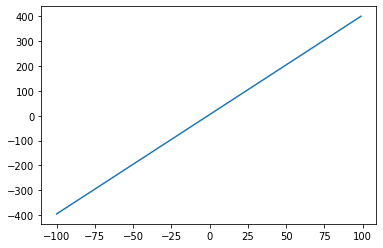

In [91]:
#call in main
x=np.arange(-100,100) # start =-100  stop =100 means 100-1=99 and step=+1
y=poly_1(x)
#call plot
plot(x,y)

In [93]:
def poly_2(x):  #Quadratic 
    y=6*(x**2)+4*x+5       #y=m2x^2+m1x+b  here m2=6 ,m1=4 and b=5
    return y

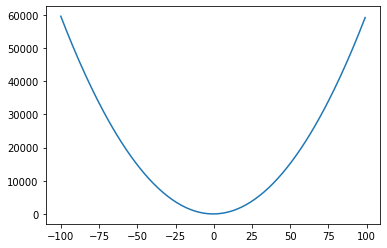

In [94]:
#call in main
x=np.arange(-100,100) # start =-100  stop =100 means 100-1=99 and step=+1
y=poly_2(x)
#call plot
plot(x,y)

In [95]:
def poly_3(x):  #cubic
    y=8*(x**3)+6*(x**2)+4*x+5 #y=m3x^3+m2x^2+m1x+b  here m3=8 m2=6 ,m1=4 and b=5
    return y

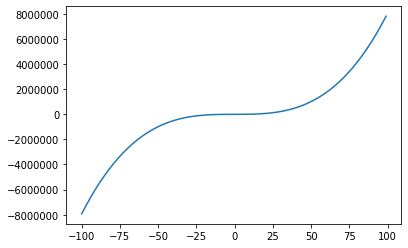

In [96]:
#call in main
x=np.arange(-100,100) # start =-100  stop =100 means 100-1=99 and step=+1
y=poly_3(x)
#call plot
plot(x,y)

In [97]:
#We perform the Actual Polynomials regression : 
from sklearn.preprocessing import PolynomialFeatures

In [98]:
# select Independent variable X and dependent variable Y
X=df[["TV","radio"]] #2D array  means Multiple Linear regression
#Y=m1(TV)+m2(radio)+b
Y=df["sales"] #1D array

In [134]:
#after that create the object of PolynomialFeatures
pf=PolynomialFeatures(2) # here 2 means degree 

In [ ]:
#we create polynomial version of X so we call fit_transform() inbuilt
#function of PolynomialFeatures class

In [135]:
X_poly=pf.fit_transform(X) #Y=m1(TV)^2+m2(TV)+m3(radio^2)+m4(radio)+b

In [136]:
#train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,
                                               random_state=1)

In [137]:
#Create object of LinearRegression
lr=LinearRegression()

In [138]:
#We train the model
lr.fit(X_train,Y_train)

LinearRegression()

In [139]:
#Testing :
#we can perform the prediction 
Y_pred=lr.predict(X_test)

In [140]:
#mean squared error
mean_squared_error(Y_test,Y_pred)

0.17238345081008266

In [141]:
r2_score(Y_test,Y_pred) #It is very good ,It is very close to 1

0.9930704848288263

In [ ]:
#Checkout the Assumption : 

In [142]:
#calculate the Residual :
residuals=Y_test-Y_pred

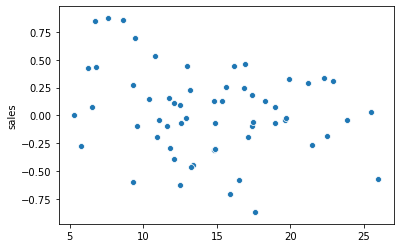

In [132]:
#to draw a scatter plot between residuals and Y_pred 
plt.figure()
sns.scatterplot(Y_pred,residuals)
plt.show()

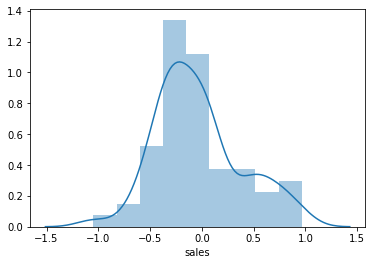

In [143]:
#distplot 
plt.figure()
sns.distplot(residuals)
plt.show()